<a href="https://colab.research.google.com/github/zahrafl/pca/blob/main/pca/Pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Persiapan mengimport *Library* yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')


Menghubungkan dengan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menampilkan konten yang ada di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menampilkan isi dari Folder PCA yang berisi dataset CSV

In [ ]:
!ls /content/drive/MyDrive/PCA/

Dataset_Nilai_Siswa_PCA.csv  PCA_Student_Scores_Dataset.csv


Memuat data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PCA/PCA_Student_Scores_Dataset.csv', sep=';')
print(df.head())

     Name  Math  Physics  Chemistry  Biology  History  Geography
0  Aditya    70       74         80       82       82         70
1    Budi    66       67         78       93       61         80
2   Citra    94       96         78       77       65         92
3    Dewi    97       94         79       93       62         63
4     Eka    96       63         90       94       66         98


Mengetahui bentuk data yang digunakan

In [ ]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       50 non-null     object
 1   Math       50 non-null     int64 
 2   Physics    50 non-null     int64 
 3   Chemistry  50 non-null     int64 
 4   Biology    50 non-null     int64 
 5   History    50 non-null     int64 
 6   Geography  50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB
Shape of data:
(50, 7)


Mencari data yang duplikat

In [ ]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")
df.isna().sum()

Jumlah data duplicated: 0

,0
Name,0
Math,0
Physics,0
Chemistry,0
Biology,0
History,0
Geography,0


Melakukan (Pra-pemrosesan) Standarisasi data : mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom-kolom nilai mata pelajaran
# Pastikan nama kolom sesuai dengan dataset Anda
features = ['Math', 'Physics', 'Chemistry', 'Biology', 'History', 'Geography']
x = df[features].values # Mengambil nilai sebagai array NumPy

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi data
x_scaled = scaler.fit_transform(x)

# (Opsional) Konversi kembali ke DataFrame untuk melihat hasilnya
df_scaled = pd.DataFrame(x_scaled, columns=features)
print("\nData setelah standarisasi:")
display(df_scaled.head())


Data setelah standarisasi:


,Math,Physics,Chemistry,Biology,History,Geography
0,-1.030613,-0.475378,-0.146739,-0.074051,0.345263,-0.816350
1,-1.359357,-1.110424,-0.325688,0.792503,-1.449422,0.021792
2,0.941852,1.520483,-0.325688,-0.467939,-1.107577,1.027562
3,1.188410,1.339041,-0.236213,0.792503,-1.363961,-1.403050
4,1.106224,-1.473308,0.748009,0.871281,-1.022116,1.530447


Menerapkan PCA, dengan menyederhanakan data menjadi 2 dimensi utama

In [ ]:
# Inisialisasi model PCA dengan 2 komponen utama
pca = PCA(n_components=2)

# Menerapkan PCA pada data yang sudah distandarisasi
principal_components = pca.fit_transform(x_scaled)

# Membuat DataFrame baru untuk komponen utama
df_pca = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

# Jika Anda memiliki kolom 'Nama Siswa' atau 'ID Siswa' di df_nilai,
# Anda bisa menggabungkannya kembali ke df_pca
# Contoh: df_pca = pd.concat([df_nilai[['Nama Siswa']], df_pca], axis = 1)

print("\nHasil PCA (2 Komponen Utama):")
print(df_pca.head())


Hasil PCA (2 Komponen Utama):
   Principal Component 1  Principal Component 2
0              -1.096247               0.204269
1              -1.405822              -1.368947
2               1.528383              -0.935287
3               1.730728              -1.555557
4               0.366760              -0.294613


Menganalisa varian


Proporsi variansi yang dijelaskan oleh PC1: 0.25
Proporsi variansi yang dijelaskan oleh PC2: 0.21
Total variansi yang dijelaskan oleh 2 komponen utama: 0.46


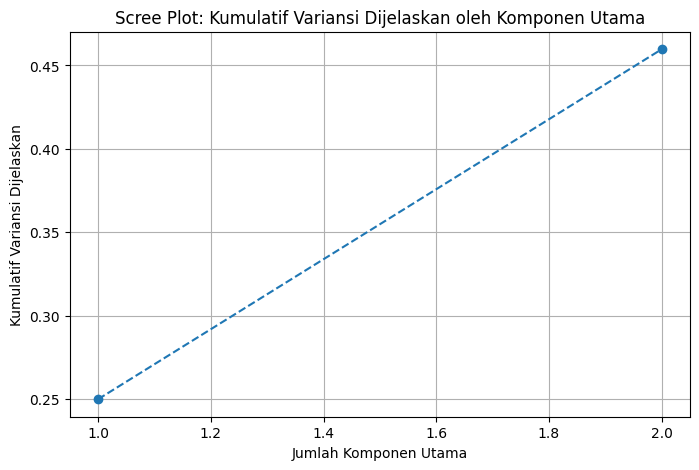

In [ ]:
# Menampilkan proporsi variansi yang dijelaskan oleh setiap komponen
print(f"\nProporsi variansi yang dijelaskan oleh PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Proporsi variansi yang dijelaskan oleh PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Total variansi yang dijelaskan oleh 2 komponen utama: {sum(pca.explained_variance_ratio_):.2f}")

# Visualisasi variansi kumulatif yang dijelaskan (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot: Kumulatif Variansi Dijelaskan oleh Komponen Utama')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Variansi Dijelaskan')
plt.grid(True)
plt.show()

Memahami kontribusi mapel terhadap komponen utama


Loading (Kontribusi) Mata Pelajaran terhadap Komponen Utama:
                PC1       PC2
Math       0.629922  0.060421
Physics    0.640186 -0.185366
Chemistry  0.390900  0.576402
Biology    0.163607 -0.445880
History   -0.109042  0.656448
Geography  0.043594 -0.004087


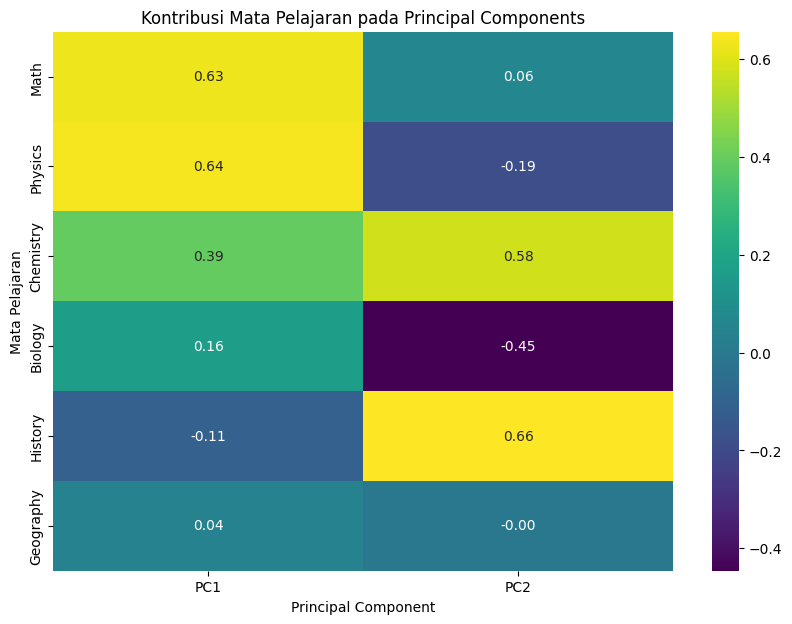

In [ ]:
# Membuat DataFrame loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print("\nLoading (Kontribusi) Mata Pelajaran terhadap Komponen Utama:")
print(loadings)

# Visualisasi loadings (Biplot atau Bar Plot)
plt.figure(figsize=(10, 7))
sns.heatmap(loadings, annot=True, cmap='viridis', fmt=".2f")
plt.title('Kontribusi Mata Pelajaran pada Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Mata Pelajaran')
plt.show()

Membuat visualisasi hasil PCA (Plot 2D)

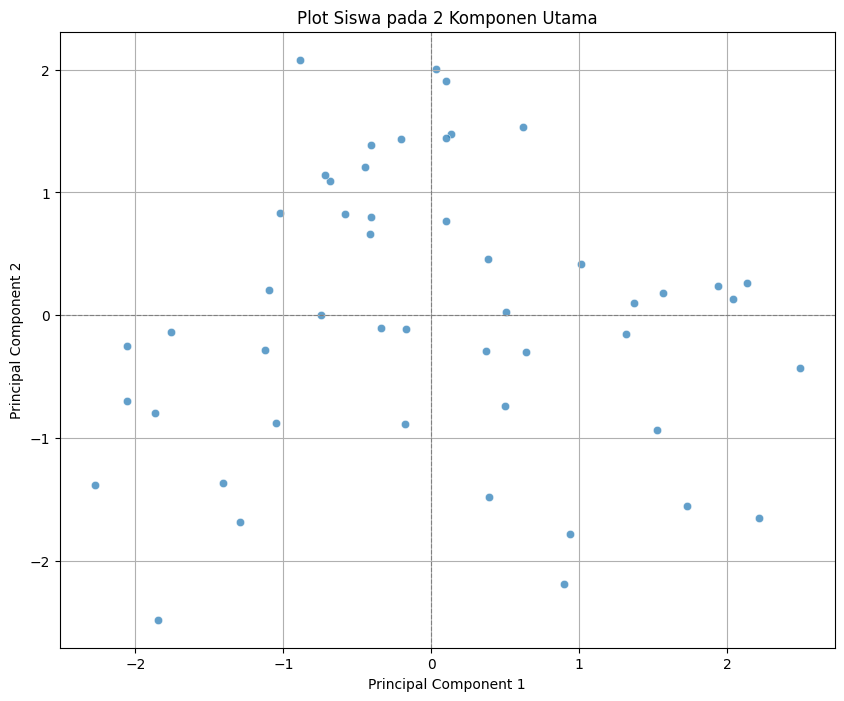

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_pca, alpha=0.7)
plt.title('Plot Siswa pada 2 Komponen Utama')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.show()